<a href="https://colab.research.google.com/github/stp511/sales_prediction1/blob/main/Project1_Part4_Sales_Predictions_Steven_Phillips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 4 of Sales Predictions



- Steven Phillips
- 10/07/2022

## Loading Data


In [2]:
#import the pandas and numpy library
import pandas as pd
import numpy as np

In [3]:
#mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Load the data for Sales Predictions csv file as a data frame and present the first five rows
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



## Data Cleaning

### Discover the shape of the Data Frame


In [5]:
#shape of data frame rows x columns or (rows, columns)
df.shape

(8523, 12)

###Display the data types of each variable

In [6]:
#display information including the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Check for duplicate rows in the data frame, and if so drop and confirm

In [7]:
#check for duplicates
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
#confirm there are no more duplicates
df.duplicated().sum()

0

###Identify Missing Values

In [9]:
#identify missing values in the data frame
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Replacing the missing values of the numeric Item_Weight with the mean of existing Item_Weight values

In [10]:
#Less than 50% of Item_Weight values missing, not dropping the column
#find the mean of Item_Weight and replace missing values in 'Item_Weight'
#confirm no more missing Item_Weight values
mean_Item_Weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Replacing the missing values of the categorical Outlet_Size with the 'Missing

In [11]:
# replace missing values in Outlet_Size with 'Missing', not using Mode as there is not a large percentage
# of one value amongst Outlet_Size 
# not deleting rows with missing Outlet_Size as too much data would be lost
#confirm no more missing Item_Weight values
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Find and Fix any inconsistent categories of data

In [12]:
#check for inconsistencies within categorial data


In [13]:
#check for inconsistencies 'Item_Identifier' [none]
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
#check for inconsistencies 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
#Within Item_Fat_Content replace reg with Regular and Lf/low fat with Low Fat and confirm
df['Item_Fat_Content'].replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace=True)
df['Item_Fat_Content'].replace(['reg'], ['Regular'], inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
#check for inconsistencies 'Item_Type' [none]
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
#check for inconsistencies 'Outlet_Identifier' [none]
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
#check for inconsistencies 'Outlet_Size' [none]
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [19]:
#check for inconsistencies 'Outlet_Location_Type' [none]
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
#check for inconsistencies 'Outlet_Type' [none]
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Display summary statistics of each numerical column, min, max, mean

In [21]:
#summary statistics of numerical columns [round to 2 decimal places]
df.agg(
    {
        "Item_Weight": ["min", "max", "mean"],
        "Item_Visibility": ["min", "max", "mean"], 
        "Item_MRP": ["min", "max", "mean"], 
        "Outlet_Establishment_Year": ["min", "max", "mean"], 
        "Item_Outlet_Sales": ["min", "max", "mean"]
    }
).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.86,0.07,140.99,1997.83,2181.29



## Exploratory Visuals

In [22]:
## import additional libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

 ###  Univariate Visuals towards Data Analysis

#### Plot 1: Distribution of Item Visibilities (Histogram)

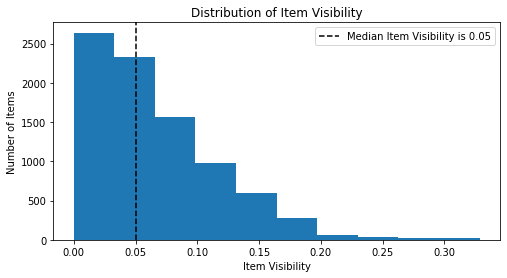

In [23]:
## creating a histogram of item visibitilies

plt.figure(figsize = (8,4))
plt.hist(df['Item_Visibility'])

## including the median visibility in our visual
median_visibility = df['Item_Visibility'].median().round(2)

## titling and labeling axes
plt.xlabel('Item Visibility')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Visibility')

plt.axvline(median_visibility, color = 'black', linestyle = '--', label = f'Median Item Visibility is {median_visibility}')
plt.legend();

We see that the distribution of item visibilities has many small values, more than half less than 0.05, and is skewed to the right.

### Plot 2: Distribution of Item MRP Values (Histogram)

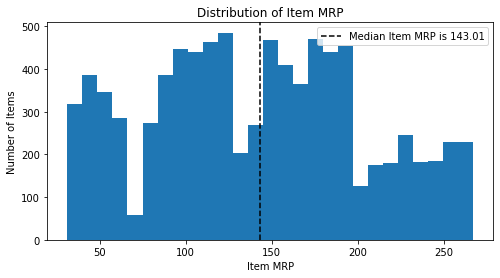

In [24]:
## creating a histogram of Item MRP
plt.figure(figsize = (8,4))
plt.hist(df['Item_MRP'], bins = 'auto')

## including the median MRP
median_MRP = df['Item_MRP'].median().round(2)

## titling and labeling
plt.xlabel('Item MRP')
plt.ylabel('Number of Items')
plt.title('Distribution of Item MRP')

plt.axvline(median_MRP, color = 'black', linestyle = '--', label = f'Median Item MRP is {median_MRP}')
plt.legend();

This distribution of Item MRP is not uniform, skewed, or symmetric.  There are many high and low values and no discernible pattern from the histogram.

### Plot 3: Distribution of Item Outlet Sales (Histogram)

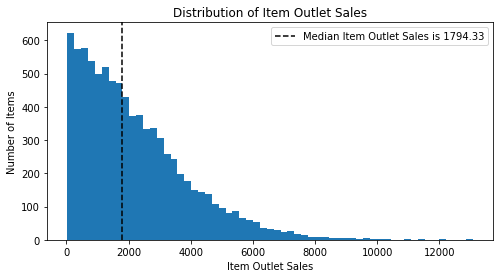

In [25]:
## histogram of outlet sales
plt.figure(figsize = (8,4))
plt.hist(df['Item_Outlet_Sales'], bins = 'auto')

## including the median outlet sales
median_outlet_sales = df['Item_Outlet_Sales'].median().round(2)

## titling and labeling
plt.xlabel('Item Outlet Sales')
plt.ylabel('Number of Items')
plt.title('Distribution of Item Outlet Sales')

plt.axvline(median_outlet_sales, color = 'black', linestyle = '--', label = f'Median Item Outlet Sales is {median_outlet_sales}')
plt.legend();

This distribution of Item Outlet Sales has more than half of the values below 2000 sales, and is skewed to the right.

### Plot 4: Distribution of Item Weights (Histogram)


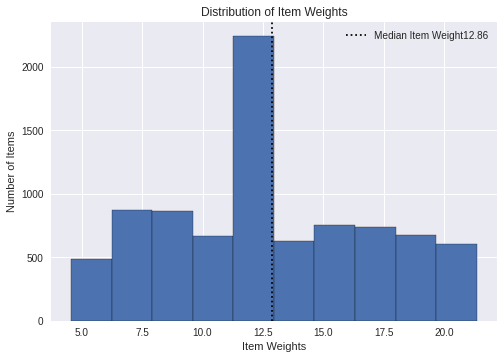

In [26]:
## histogram of item weights

plt.style.use('seaborn')
item_weight_hist = df['Item_Weight'].hist(bins = 10, edgecolor = 'black');

#including the median item weight
median = df['Item_Weight'].median().round(2)

item_weight_hist.set(xlabel='Item Weights', ylabel='Number of Items',
       title='Distribution of Item Weights')

item_weight_hist.axvline(median, color='k', ls=':', 
            label=f'Median Item Weight{median}')

item_weight_hist.legend();

This distribution of item weights is pretty uniform with the slight exception around 12 ounces.  There is a large numer of items close to 12 ounces.

### Plot 5: Distribution of Item Weights (Boxplot)


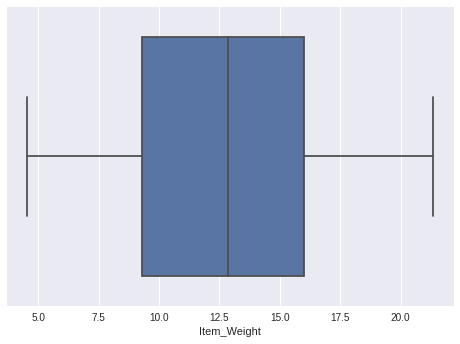

In [27]:
## boxplot of item weights
sns.boxplot(data=df, x='Item_Weight');

This boxplot of the distribution of Item Weights agrees with the histogram.  As is the case with any single boxplot, more information is gathered from the histogram and no additional information is discovered here.

### Plot 6: Distribution of Outlet Location Types (Bar graph)

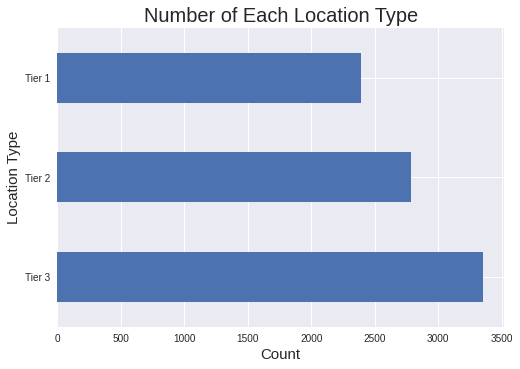

In [28]:
location_type_counts = df['Outlet_Location_Type'].value_counts()#.sort_values()

## Plot the counts of each Outlet Location Type

location_type_counts.plot(kind = 'barh')
plt.title('Number of Each Location Type', fontsize = 20)
plt.ylabel('Location Type', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Display of the figure
plt.show()


Here is a horizontal bar graph of the counts of Location Type, Tier 1, 2, or 3 of each outlet.  We see the highest category of outlets is Tier 3.

### Plot 7: Distribution of Item Weights across Location Types (Side-by-Side Boxplots)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


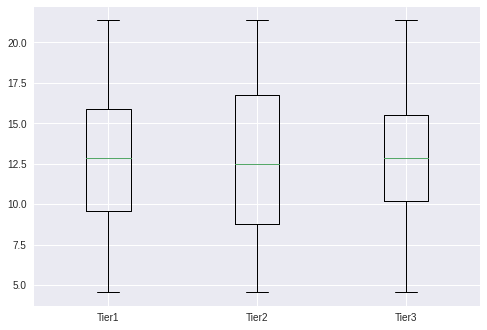

In [29]:
## create a side by side boxplot of Item Weights across location types
tier1 = df.loc[df['Outlet_Location_Type']=='Tier 1', 'Item_Weight'].values
tier2 = df.loc[df['Outlet_Location_Type']=='Tier 2', 'Item_Weight'].values
tier3 = df.loc[df['Outlet_Location_Type']=='Tier 3', 'Item_Weight'].values
plt.boxplot([tier1,tier2, tier3], labels = ['Tier1', 'Tier2', 'Tier3']);

This side-by-side boxplot visual shows that all three distributions of outlet types have similar ninimums, maximums, medians, ranges, and interquartile ranges.

### Plot 8: A Heatmap to discover the correlation between each pair of numerical variables.

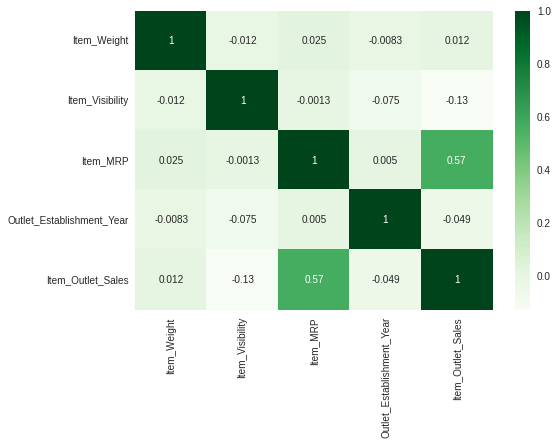

In [30]:
## produce a heatmap of correlation coefficients 
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Only one comparison within the Heatmap has a correlation above .3, names Item MRP with Item Outlet Sales. The correlation between these two of 0.57 is moderate correlation.

### Plot 9: A Scatterplot of Item MRP with Item Outlet Sales

Text(0.5, 0, 'Item MRP')

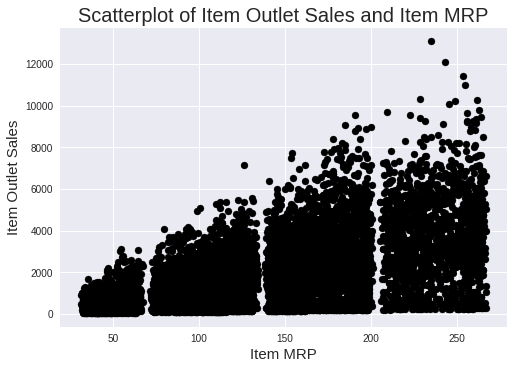

In [31]:
## producing a scatterplot of Item Outlet Sales with Item MRP
item_mrp_corr = df['Item_MRP'].values
item_outlet_sales_corr = df['Item_Outlet_Sales'].values

plt.scatter(item_mrp_corr, item_outlet_sales_corr, c = 'k')

## titles and labels
plt.title('Scatterplot of Item Outlet Sales and Item MRP', fontsize = 20)
plt.ylabel('Item Outlet Sales', fontsize = 15)
plt.xlabel('Item MRP', fontsize = 15)




This scatterplot of Item MRP with Item Outlet Sales agrees with the correlation coefficient between Item MRP and Item Outlet Sales, 0.57, a moderate correlation value. This scatterplot has a slight fan shape, and some type of grouping might be analyzed in the future.


## Explanatory Visuals

### Explanatory Plot 1 - revision of Histogram of Item Visibilities

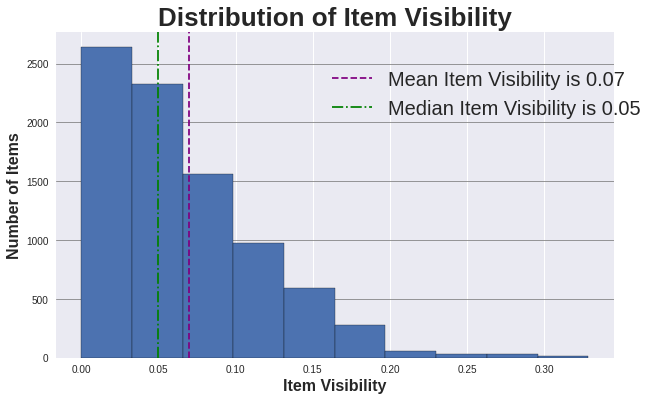

In [32]:
## revising a histogram of item visibitilies

## change to 'seaborn' style
plt.style.use('seaborn')

## enlarge the figure size
plt.figure(figsize = (10,6))

## add black edges to the bars
plt.hist(df['Item_Visibility'], edgecolor = 'black')

## including the median visibility in our visual
## median_visibility = df['Item_Visibility'].median().round(2)


## add the mean visibility in our visual
mean_visibility = df['Item_Visibility'].mean().round(2)

## adjust the grid axis - horizontal lines, grey, solid lines
plt.grid(axis = 'y', c = 'grey', alpha = .8, linestyle = '-')

## titling and labeling axes - increase the font sizes and weight
plt.xlabel('Item Visibility', fontsize = 16, fontweight='semibold')
plt.ylabel('Number of Items', fontsize = 16, fontweight='semibold')
plt.title('Distribution of Item Visibility', fontsize = 26, fontweight='semibold')

## add mean and median lines
plt.axvline(mean_visibility, color = 'purple', linestyle = '--', label = f'Mean Item Visibility is {mean_visibility}')
plt.axvline(median_visibility, color = 'green', linestyle = '-.', label = f'Median Item Visibility is {median_visibility}')

## enlarge the legend and move the location
plt.legend(loc = (.48, .71), fontsize = 20);

We see that the distribution of item visibilities has many small values, more than half less than 0.05, and is skewed to the right. The mean Item Visibility is 0.07.

### Explanatory Plot 2 - revision of Item Outlet Sales and Item MRP Scatterplot


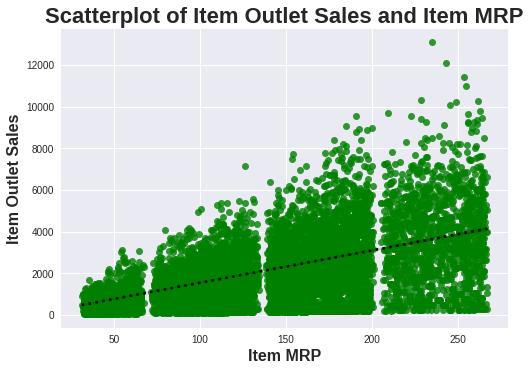

In [33]:
## producing a scatterplot of Item Outlet Sales with Item MRP


ax = sns.regplot(data=df, x = 'Item_MRP', y = 'Item_Outlet_Sales', color = 'green', line_kws = {'color':'black', 'ls': ':'})

## change to 'seaborn' style
## plt.style.use('seaborn')


## titles and labels - change the font sizes and weights 
plt.title('Scatterplot of Item Outlet Sales and Item MRP', fontsize = 22, fontweight='semibold');
plt.ylabel('Item Outlet Sales', fontsize = 16, fontweight='semibold');
plt.xlabel('Item MRP', fontsize = 16,fontweight='semibold');

This scatterplot of Item MRP with Item Outlet Sales agrees with the correlation coefficient between Item MRP and Item Outlet Sales, 0.57, a moderate correlation value.  We also see there is a positive trend between Item MRP and Item Outlet Sales.

### Explanatory Plot 3 - Side by Side Bar Plots of the Effect of Item Fat Content


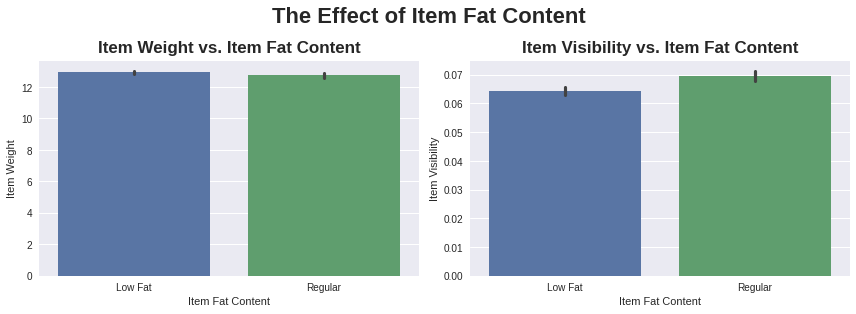

In [56]:
## create side by side barplot (using object oriented)
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

## first barplot item weight vs item fat content
sns.barplot(data=df, x = 'Item_Fat_Content', y = 'Item_Weight', ax = axes[0])
axes[0].set_title('Item Weight vs. Item Fat Content', fontsize = 17, fontweight = 'bold', y = 1.01)
axes[0].set_xlabel('Item Fat Content')
axes[0].set_ylabel('Item Weight')

## second barplot item visibility vs item fat content
sns.barplot(data=df, x = 'Item_Fat_Content', y = 'Item_Visibility', ax=axes[1])
axes[1].set_title('Item Visibility vs. Item Fat Content', fontsize = 17, fontweight = 'bold', y = 1.01)
axes[1].set_xlabel('Item Fat Content')
axes[1].set_ylabel('Item Visibility')

## create title
fig.suptitle('The Effect of Item Fat Content', fontsize = 22, fontweight = 'bold', y = 1.08)


fig.tight_layout();

This pair of bar plots is a visual showing Item Fat Content versus Item Weight and Item Fat Content versus Item Visibility.  While the Item Weight seems to be very similar, there does seem to be an increase in Item Visibility for Regular Fat Items over Low Fat Items as seen on the bar plot to the right.